# Random Forest 

In [1]:
import sklearn as skl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prep2b import DataPreparation
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE


from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedShuffleSplit
from sklearn import tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier, BaggingClassifier, StackingClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.metrics import classification_report
%matplotlib inline

In [2]:
prep = DataPreparation()

train_db = pd.read_csv("dataset/train_radiomics_hipocamp.csv")
test_db = pd.read_csv("dataset/test_radiomics_hipocamp.csv")
control_db = pd.read_csv("dataset/train_radiomics_occipital_CONTROL.csv")

train_db = prep.prep_train(train_db)
test_db = prep.transform(test_db)
control_db = prep.transform(control_db)

In [3]:
train_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Columns: 382 entries, diagnostics_Image-original_Mean to Transition
dtypes: float64(381), object(1)
memory usage: 910.4+ KB


In [4]:
test_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Columns: 381 entries, diagnostics_Image-original_Mean to Age
dtypes: float64(381)
memory usage: 297.8 KB


In [5]:
X = train_db.drop(columns=["Transition"]) 
y = train_db["Transition"]  
smote = SMOTE(sampling_strategy='auto', random_state=42)
X, y = smote.fit_resample(X, y)

In [6]:
X_train = pd.read_csv('prep2b/train_X.csv')
X_test = pd.read_csv('prep2b/test_X.csv')
y_train = pd.read_csv('prep2b/train_y.csv')
y_test = pd.read_csv('prep2b/test_y.csv')

Fitting 10 folds for each of 16 candidates, totalling 160 fits
Melhores parâmetros encontrados: {'classifier__bootstrap': False, 'classifier__max_depth': 5, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 5, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 50}
F1 Score médio com validação cruzada: 0.697447218041228


/home/tiagogr/miniconda3/envs/DAA/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Matriz de Confusão:


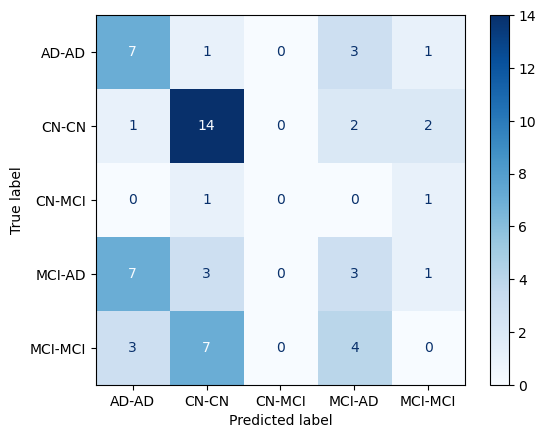


Relatório de Classificação:
              precision    recall  f1-score   support

       AD-AD       0.39      0.58      0.47        12
       CN-CN       0.54      0.74      0.62        19
      CN-MCI       0.00      0.00      0.00         2
      MCI-AD       0.25      0.21      0.23        14
     MCI-MCI       0.00      0.00      0.00        14

    accuracy                           0.39        61
   macro avg       0.24      0.31      0.26        61
weighted avg       0.30      0.39      0.34        61



/home/tiagogr/miniconda3/envs/DAA/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/tiagogr/miniconda3/envs/DAA/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/tiagogr/miniconda3/envs/DAA/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

In [9]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline  # Para integrar o SMOTE ao pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

# Configuração do SMOTE
smote = SMOTE(random_state=2024)

# Classificador
clf = RandomForestClassifier(random_state=2024)

# Parâmetros para GridSearch
param_grid = {
    'classifier__n_estimators': [50],          
    'classifier__max_depth': [3,5],                
    'classifier__min_samples_split': [5,10],         
    'classifier__min_samples_leaf': [5,10],           
    'classifier__max_features': ['sqrt', 'log2'],
    'classifier__bootstrap': [False],
    
}

# Pipeline que integra o SMOTE e o classificador
pipeline = Pipeline(steps=[('smote', smote), ('classifier', clf)])

# Validação cruzada
cv_strategy = StratifiedKFold(n_splits=10)

# GridSearch com o Pipeline
grid_search = GridSearchCV(
    estimator=pipeline, 
    param_grid=param_grid, 
    scoring='f1_macro',  
    cv=cv_strategy,        
    verbose=1,              
    refit=True,
    n_jobs=-1 
)

# Treinamento com GridSearch
grid_search.fit(X, y)

# Resultados
print("Melhores parâmetros encontrados:", grid_search.best_params_)

best_model = grid_search.best_estimator_

print("F1 Score médio com validação cruzada:", grid_search.best_score_)

best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

print("Matriz de Confusão:")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
plt.show()

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))


### Testar controlo

F1-Score no conjunto de controle: 0.16974948951641017


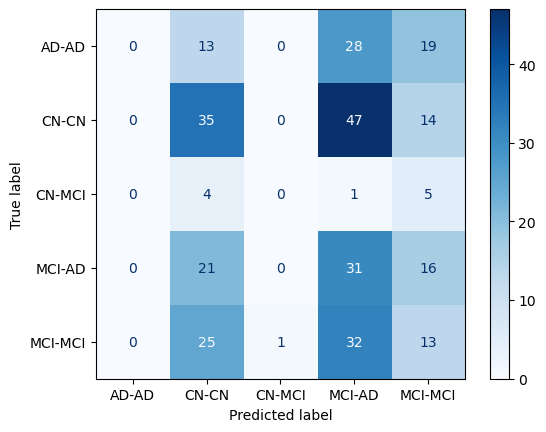


Relatório de Classificação no conjunto de controle:
              precision    recall  f1-score   support

       AD-AD       0.00      0.00      0.00        60
       CN-CN       0.36      0.36      0.36        96
      CN-MCI       0.00      0.00      0.00        10
      MCI-AD       0.22      0.46      0.30        68
     MCI-MCI       0.19      0.18      0.19        71

    accuracy                           0.26       305
   macro avg       0.15      0.20      0.17       305
weighted avg       0.21      0.26      0.22       305



/home/tiagogr/miniconda3/envs/DAA/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/tiagogr/miniconda3/envs/DAA/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/tiagogr/miniconda3/envs/DAA/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

In [8]:
CX = control_db.drop(columns=["Transition"]) 
Cy = control_db["Transition"]  

control_pred = best_model.predict(CX)

control_f1_score = f1_score(Cy, control_pred, average='macro')
print("F1-Score no conjunto de controle:", control_f1_score)

# Matriz de Confusão
ConfusionMatrixDisplay.from_predictions(Cy, control_pred, cmap='Blues')
plt.show()

# Relatório de Classificação
print("\nRelatório de Classificação no conjunto de controle:")
print(classification_report(Cy, control_pred))


### Guardar o melhor modelo do random forest

In [17]:
best_model.fit(X, y)
test_predictions = best_model.predict(test_db)

row_ids = range(1, len(test_predictions) + 1)

output_df = pd.DataFrame({
    "RowId": row_ids,
    "Result": test_predictions
})


output_df.to_csv("resultados/rf2b.csv", index=False)